In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from more_itertools import chunked
import seaborn as sns

In [2]:


# Q-learning Table Initialization
def initialize_q_table(rows=4, cols=12):
    q_table = np.zeros((4, cols * rows))  # 4 actions, rows x cols states
    return q_table

# Epsilon-Greedy Policy
def epsilon_greedy(state, q_table, epsilon):
    if np.random.random() < epsilon:
        action = np.random.choice(4)  # 4 actions: UP, LEFT, RIGHT, DOWN
    else:
        action = np.argmax(q_table[:, state])
    return action

# Agent Movement
def move_agent(current_position, action, rows=4, cols=12):
    posX, posY = current_position
    if action == 0 and posX > 0:         # UP
        posX -= 1
    elif action == 1 and posY > 0:       # LEFT
        posY -= 1
    elif action == 2 and posY < cols-1:  # RIGHT
        posY += 1
    elif action == 3 and posX < rows-1:  # DOWN
        posX += 1
    return posX, posY

# State Evaluation
def evaluate_state(agent_pos, q_table, rows=4, cols=12):
    state = cols * agent_pos[0] + agent_pos[1]
    state_value = np.amax(q_table[:, state])
    return state, state_value

# Reward Calculation
def calculate_reward(state, rows=4, cols=12):
    game_end = False
    reward = -1  # default reward for non-terminal states
    if state == rows * cols - 1:  # Goal state
        game_end = True
        reward = 20
    elif state >= (rows-1) * cols and state < rows * cols - 1:  # Cliff states
        game_end = True
        reward = -100
    return reward, game_end

# Q-Table Update
def update_q_table(q_table, state, action, reward, next_state_value, gamma=0.9, alpha=0.2):
    q_table[action, state] += alpha * (reward + gamma * next_state_value - q_table[action, state])
    return q_table

# Q-Learning Algorithm
def q_learning(epsilon, num_episodes=1200, gamma_discount=0.9, alpha=0.1, rows=4, cols=12):
    rewards_summary = []
    steps_summary = []
    q_table = initialize_q_table(rows, cols)

    for episode in range(num_episodes):
        agent_pos = (rows-1, 0)  # Starting position
        total_reward = 0
        total_steps = 0
        game_end = False

        while not game_end:
            state, _ = evaluate_state(agent_pos, q_table)
            action = epsilon_greedy(state, q_table, epsilon)
            next_pos = move_agent(agent_pos, action)
            total_steps += 1
            next_state, _ = evaluate_state(next_pos, q_table)
            reward, game_end = calculate_reward(next_state)
            total_reward += reward
            max_next_state_value = np.amax(q_table[:, next_state])
            q_table = update_q_table(q_table, state, action, reward, max_next_state_value, gamma_discount, alpha)
            agent_pos = next_pos

        rewards_summary.append(total_reward)
        steps_summary.append(total_steps)

    return q_table, rewards_summary, steps_summary

# SARSA algorithm function

def sarsa(epsilon, num_episodes=1200, gamma_discount=0.9, alpha=0.1, rows=4, cols=12):
    rewards_summary = []
    steps_summary = []
    q_table = initialize_q_table(rows, cols)

    for episode in range(num_episodes):
        agent_pos = (rows-1, 0)  # Starting position
        total_reward = 0
        total_steps = 0
        game_end = False

        state, _ = evaluate_state(agent_pos, q_table)
        action = epsilon_greedy(state, q_table, epsilon)

        while not game_end:
            next_pos = move_agent(agent_pos, action)
            total_steps += 1
            next_state, _ = evaluate_state(next_pos, q_table)
            reward, game_end = calculate_reward(next_state)
            total_reward += reward
            next_action = epsilon_greedy(next_state, q_table, epsilon)
            next_state_value = q_table[next_action, next_state]
            q_table = update_q_table(q_table, state, action, reward, next_state_value, gamma_discount, alpha)
            agent_pos, state, action = next_pos, next_state, next_action

        rewards_summary.append(total_reward)
        steps_summary.append(total_steps)

    return q_table, rewards_summary, steps_summary

In [3]:
# Perform Q-Learning and SARSA
epsilon_value = 0.1
q_table_q, rewards_q_learning, steps_q_learning = q_learning(epsilon=epsilon_value)
q_table_s, rewards_sarsa, steps_sarsa = sarsa(epsilon=epsilon_value)

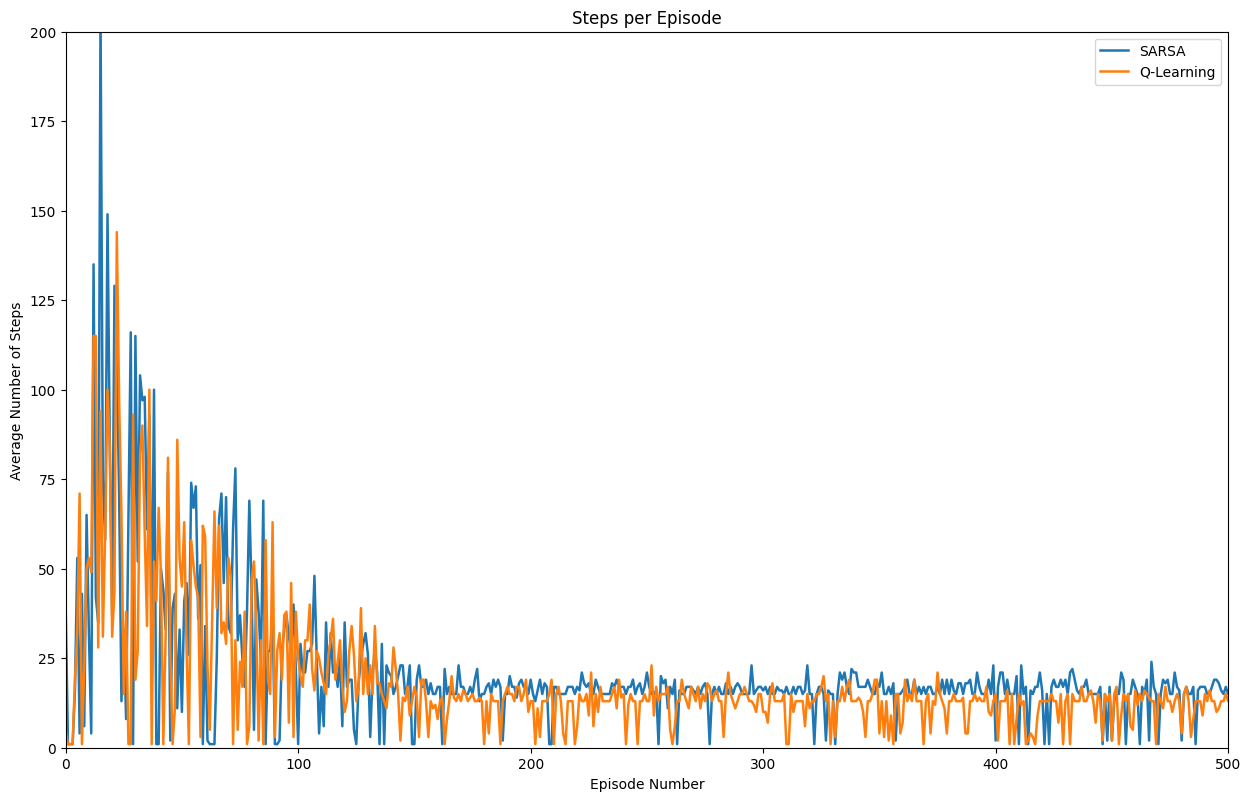

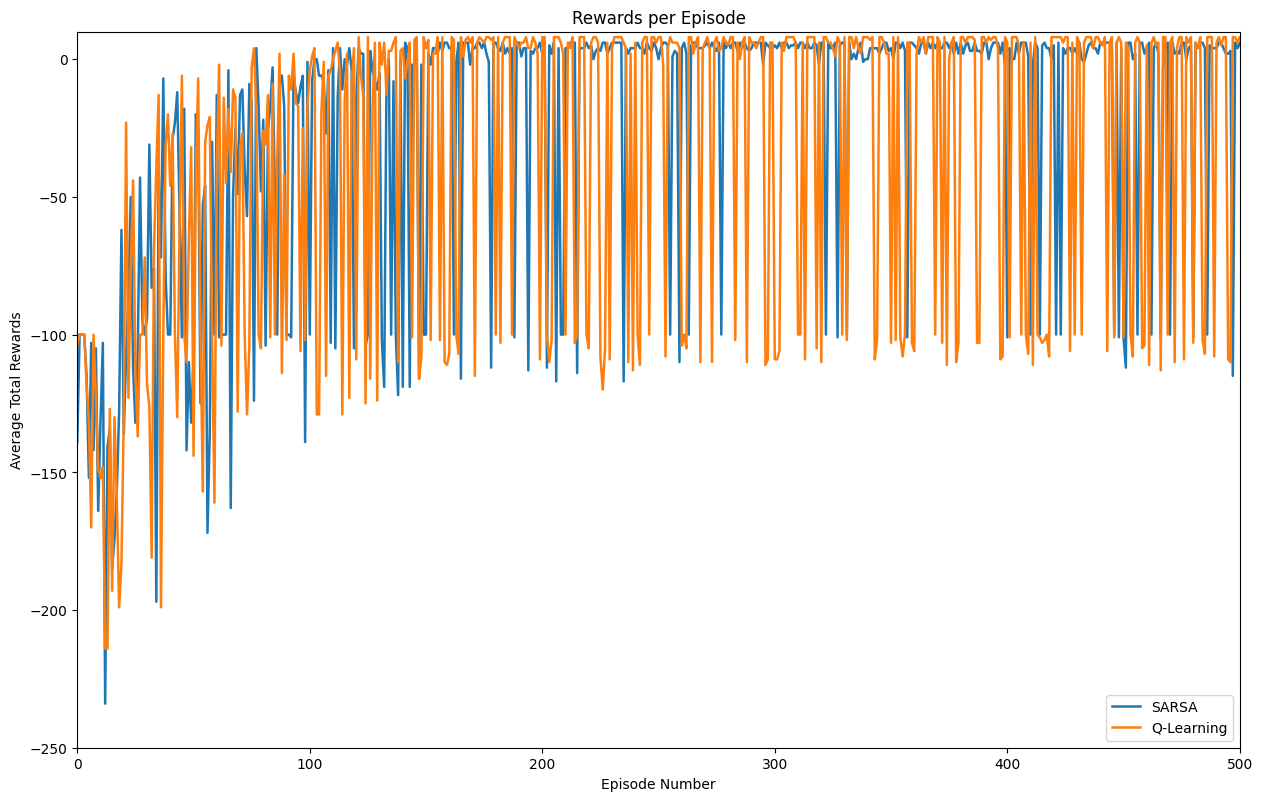

In [4]:
# Plotting the results
plt.figure(figsize=(15, 9.3))
average_steps_sarsa = [sum(x) / len(x) for x in chunked(steps_sarsa, 1)]
average_steps_q_learning = [sum(x) / len(x) for x in chunked(steps_q_learning, 1)]
plt.plot(average_steps_sarsa, lw=1.8, label='SARSA')
plt.plot(average_steps_q_learning, lw=1.8, label='Q-Learning')
plt.xlim((0, 500))
plt.ylim((0, 200))
plt.xlabel('Episode Number')
plt.ylabel('Average Number of Steps')
plt.legend(loc='best')
plt.title('Steps per Episode')
plt.show()

plt.figure(figsize=(15, 9.3))
average_rewards_sarsa = [sum(x) / len(x) for x in chunked(rewards_sarsa, 1)]
average_rewards_q_learning = [sum(x) / len(x) for x in chunked(rewards_q_learning, 1)]
plt.plot(average_rewards_sarsa, lw=1.8, label='SARSA')
plt.plot(average_rewards_q_learning, lw=1.8, label='Q-Learning')
plt.xlim((0, 500))
plt.ylim((-250, 10))
plt.xlabel('Episode Number')
plt.ylabel('Average Total Rewards')
plt.legend(loc='best')
plt.title('Rewards per Episode')
plt.show()


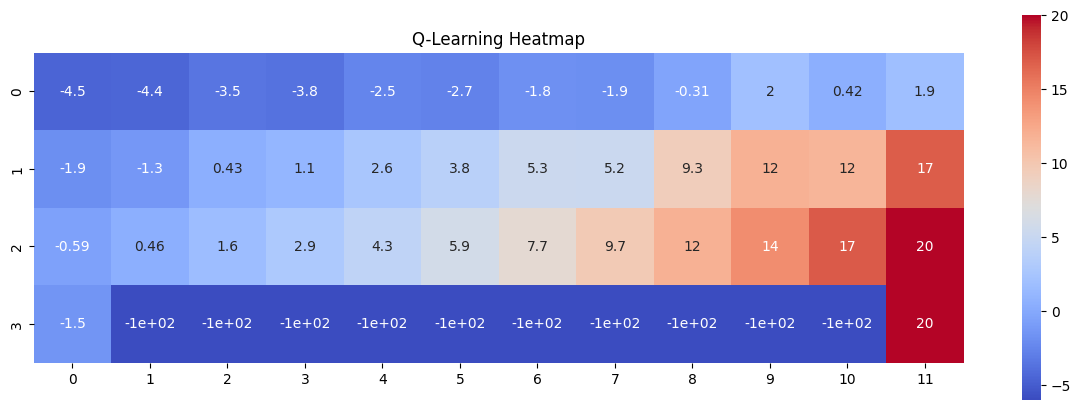

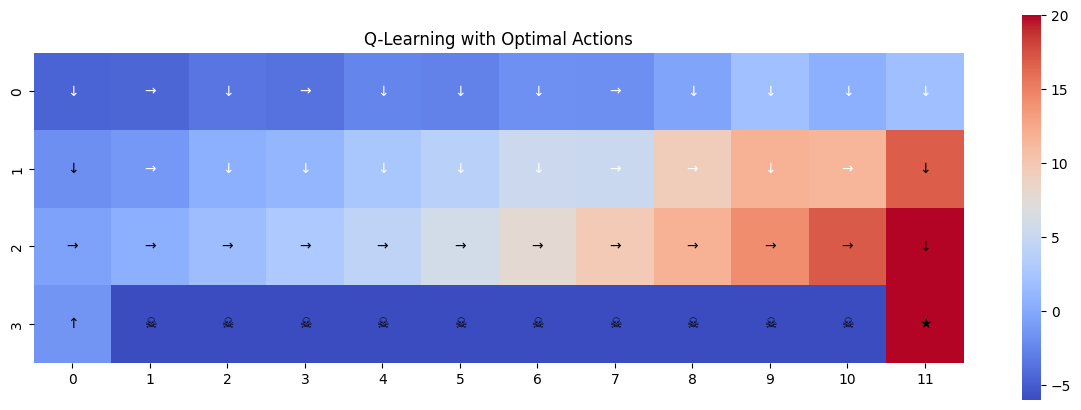

In [5]:
# Perform Q-Learning
epsilon_value = 0.1
q_table_q, rewards_q_learning, steps_q_learning = q_learning(epsilon=epsilon_value)

# Plotting the Q-Table heatmap
plt.figure(figsize=(15, 5))
q_table_qlearning = np.max(q_table_q, axis=0)
for i in range(len(q_table_qlearning)):
    if i >= 37 and i <= 46:
        q_table_qlearning[i] = -100
    elif i == 47:
        q_table_qlearning[i] = 20

q_table_qlearning = q_table_qlearning.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_qlearning), cmap='coolwarm', annot=True, vmin=-6, vmax=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Q-Learning Heatmap')
plt.show()

# Adjusting the code for arrow visualization
h_ = np.argmax(q_table_q, 0).tolist()

# Convert action indices to arrow symbols
h_ = ['↑' if i==0 else i for i in h_]
h_ = ['←' if i==1 else i for i in h_]
h_ = ['→' if i==2 else i for i in h_]
h_ = ['↓' if i==3 else i for i in h_]

# Handling the cliff and goal states
for i in range(len(h_)):
    if i >= 37 and i < 47:  # Cliff states
        h_[i] = '☠'  # Symbol for cliff
    elif i == 47:  # Goal state
        h_[i] = '★'  # Symbol for goal

# Reshape for heatmap
h_ = np.asarray(h_).reshape(4, 12)

# Create heatmap with arrows
plt.figure(figsize=(15, 5))
q_table_qlearning = np.max(q_table_q, axis=0)
for i in range(len(q_table_qlearning)):
    if i >= 37 and i <= 46:
        q_table_qlearning[i] = -100
    elif i == 47:
        q_table_qlearning[i] = 20

q_table_qlearning = q_table_qlearning.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_qlearning), cmap='coolwarm', vmin=-6, vmax=20)

# Add arrows to the heatmap
for i in range(4):
    for j in range(12):
        text = ax.text(j+0.5, i+0.5, h_[i, j], ha="center", va="center", color="black" if i in [2, 3] or (i == 1 and j in [0, 11]) else "white")

plt.title('Q-Learning with Optimal Actions')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

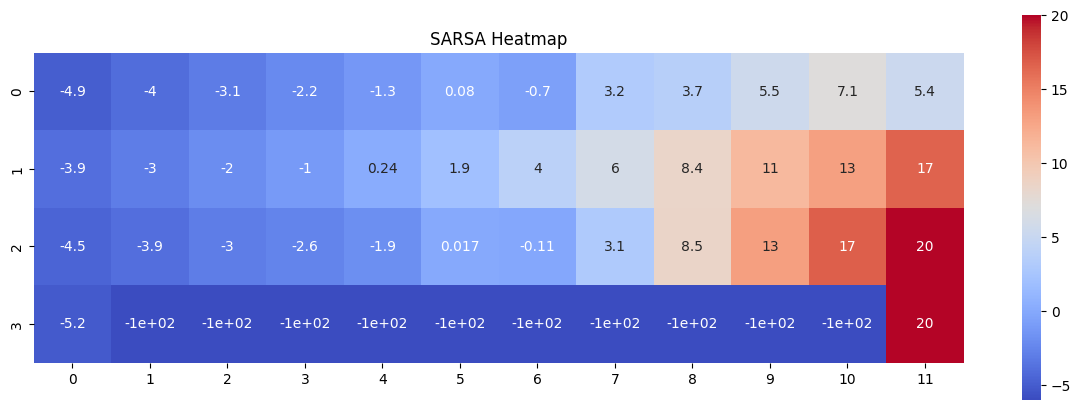

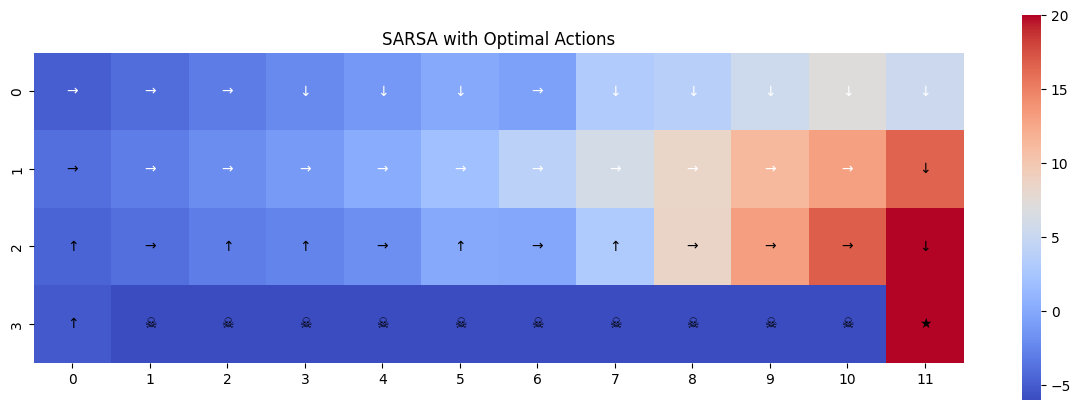

In [6]:
# Performing SARSA
q_table_s, rewards_sarsa, steps_sarsa = sarsa(epsilon=epsilon_value)

# Plotting the Q-Table heatmap for SARSA
plt.figure(figsize=(15, 5))
q_table_sarsa = np.max(q_table_s, axis=0)
for i in range(len(q_table_sarsa)):
    if i >= 37 and i <= 46:
        q_table_sarsa[i] = -100  # Cliff states
    elif i == 47:
        q_table_sarsa[i] = 20  # Goal state

q_table_sarsa = q_table_sarsa.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_sarsa), cmap='coolwarm', annot=True, vmin=-6, vmax=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('SARSA Heatmap')
plt.show()

# Adjusting the code for arrow visualization for SARSA
h_sarsa = np.argmax(q_table_s, 0).tolist()

# Convert action indices to arrow symbols for SARSA
h_sarsa = ['↑' if i==0 else i for i in h_sarsa]
h_sarsa = ['←' if i==1 else i for i in h_sarsa]
h_sarsa = ['→' if i==2 else i for i in h_sarsa]
h_sarsa = ['↓' if i==3 else i for i in h_sarsa]

# Handling the cliff and goal states for SARSA
for i in range(len(h_sarsa)):
    if i >= 37 and i < 47:  # Cliff states
        h_sarsa[i] = '☠'  # Symbol for cliff
    elif i == 47:  # Goal state
        h_sarsa[i] = '★'  # Symbol for goal

# Reshape for heatmap for SARSA
h_sarsa = np.asarray(h_sarsa).reshape(4, 12)

# Create heatmap with arrows for SARSA
plt.figure(figsize=(15, 5))
q_table_sarsa = np.max(q_table_s, axis=0)
for i in range(len(q_table_sarsa)):
    if i >= 37 and i <= 46:
        q_table_sarsa[i] = -100
    elif i == 47:
        q_table_sarsa[i] = 20

q_table_sarsa = q_table_sarsa.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_sarsa), cmap='coolwarm', vmin=-6, vmax=20)

# Add arrows to the heatmap for SARSA
for i in range(4):
    for j in range(12):
        text = ax.text(j+0.5, i+0.5, h_sarsa[i, j], ha="center", va="center", color="black" if i in [2, 3] or (i == 1 and j in [0, 11]) else "white")

plt.title('SARSA with Optimal Actions')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [7]:
import random

class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = []
        self.position = 0

    def push(self, state, action, reward, next_state, done):
        if len(self.buffer) < self.capacity:
            self.buffer.append(None)
        self.buffer[self.position] = (state, action, reward, next_state, done)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)

# Modify Q-Learning to use Replay Buffer
def q_learning_with_buffer(epsilon, num_episodes, gamma, alpha, rows, cols, buffer, batch_size):
    rewards_summary = []
    steps_summary = []
    q_table = initialize_q_table(rows, cols)

    for episode in range(num_episodes):
        agent_pos = (rows-1, 0)  # Starting position
        game_end = False

        while not game_end:
            state, _ = evaluate_state(agent_pos, q_table)
            action = epsilon_greedy(state, q_table, epsilon)
            next_pos = move_agent(agent_pos, action)
            next_state, _ = evaluate_state(next_pos, q_table)
            reward, game_end = calculate_reward(next_state)

            buffer.push(state, action, reward, next_state, game_end)

            if len(buffer) >= batch_size:
                batch = buffer.sample(batch_size)
                for s, a, r, next_s, d in batch:
                    max_next_state_value = np.amax(q_table[:, next_s])
                    q_table[a, s] += alpha * (r + gamma * max_next_state_value * (not d) - q_table[a, s])

            agent_pos = next_pos

        # Compute total rewards and steps after each episode for summary
        rewards_summary.append(sum([r for _, _, r, _, _ in buffer.buffer]))
        steps_summary.append(len(buffer.buffer))

    return q_table, rewards_summary, steps_summary

# Example usage
buffer_capacity = 1000
batch_size = 32
num_episodes = 1200
epsilon = 0.1
gamma = 0.9
alpha = 0.1
rows = 4
cols = 12

replay_buffer = ReplayBuffer(buffer_capacity)
q_table, rewards, steps = q_learning_with_buffer(epsilon, num_episodes, gamma, alpha, rows, cols, replay_buffer, batch_size)


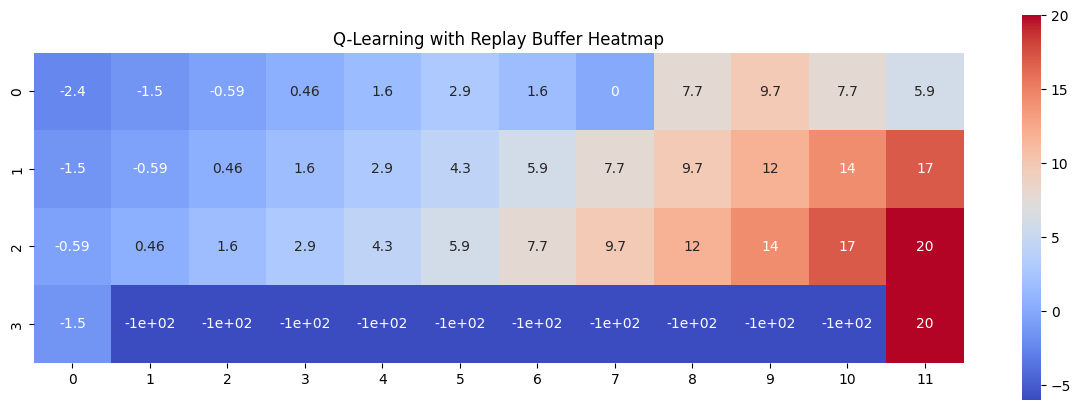

In [8]:
# Assuming `q_learning_with_buffer` has been run and returned the necessary data:
q_table_q, rewards_q_learning, steps_q_learning =  q_learning_with_buffer(epsilon, num_episodes, gamma, alpha, rows, cols, replay_buffer, batch_size)

# Plotting the Q-Table heatmap
plt.figure(figsize=(15, 5))
q_table_qlearning_with_buffer = np.max(q_table_q, axis=0)
for i in range(len(q_table_qlearning_with_buffer)):
    if i >= 37 and i <= 46:
        q_table_qlearning_with_buffer[i] = -100
    elif i == 47:
        q_table_qlearning_with_buffer[i] = 20

q_table_qlearning_with_buffer = q_table_qlearning_with_buffer.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_qlearning_with_buffer), cmap='coolwarm', annot=True, vmin=-6, vmax=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Q-Learning with Replay Buffer Heatmap')
plt.show()


# different values for ϵ

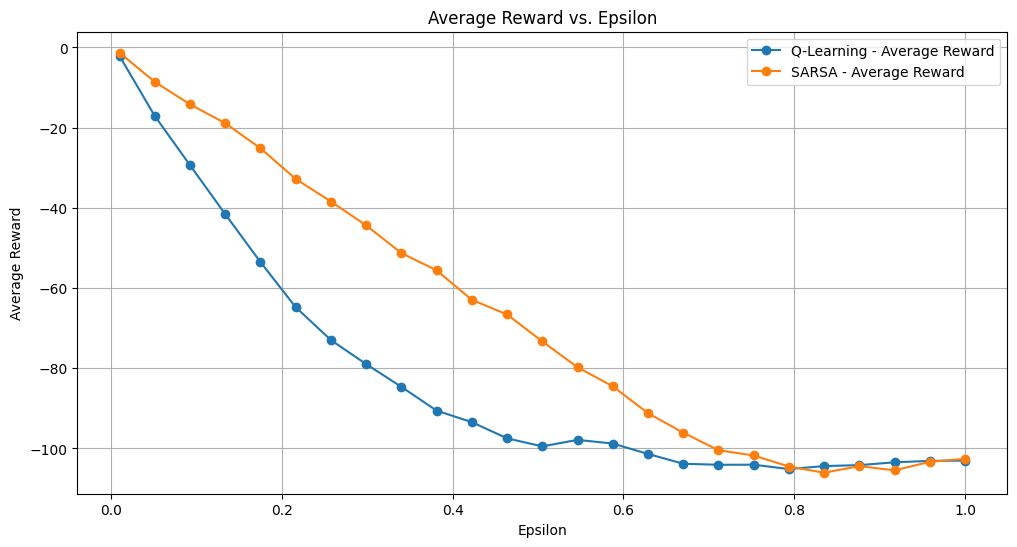

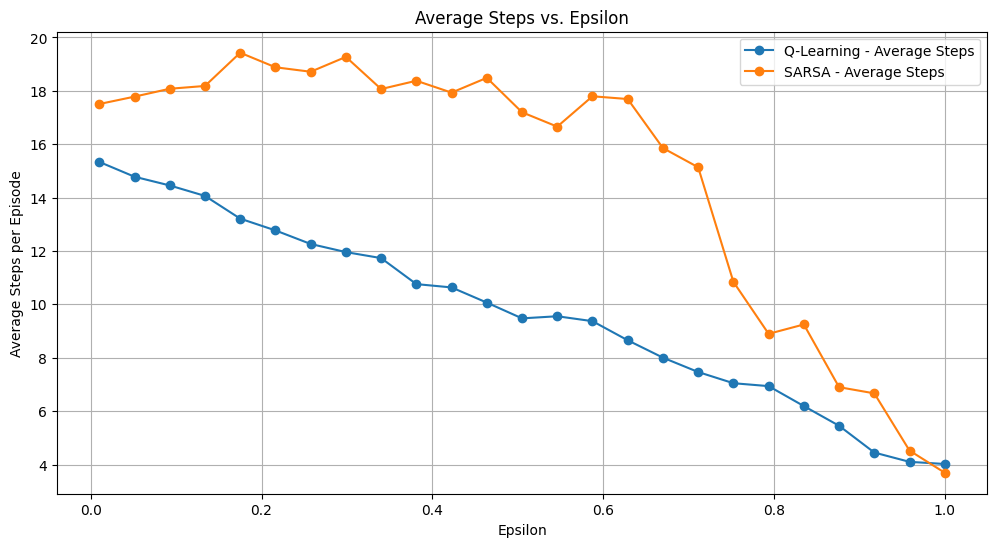

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Use your existing Q-learning and SARSA functions

# Define a range of epsilon values to try
epsilon_values = np.linspace(0.01, 1, 25)  # Epsilon values from 0.01 to 1

# Prepare lists to store results
avg_rewards_q_learning = []
avg_steps_q_learning = []
avg_rewards_sarsa = []
avg_steps_sarsa = []

# Run experiments for each epsilon value
for epsilon in epsilon_values:
    # Q-learning
    q_table_q, rewards_q_learning, steps_q_learning = q_learning(epsilon, num_episodes=1200, gamma_discount=0.9, alpha=0.1, rows=4, cols=12)
    avg_rewards_q_learning.append(np.mean(rewards_q_learning))
    avg_steps_q_learning.append(np.mean(steps_q_learning))

    # SARSA
    q_table_s, rewards_sarsa, steps_sarsa = sarsa(epsilon, num_episodes=1200, gamma_discount=0.9, alpha=0.1, rows=4, cols=12)
    avg_rewards_sarsa.append(np.mean(rewards_sarsa))
    avg_steps_sarsa.append(np.mean(steps_sarsa))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(epsilon_values, avg_rewards_q_learning, label='Q-Learning - Average Reward', marker='o')
plt.plot(epsilon_values, avg_rewards_sarsa, label='SARSA - Average Reward', marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Epsilon')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(epsilon_values, avg_steps_q_learning, label='Q-Learning - Average Steps', marker='o')
plt.plot(epsilon_values, avg_steps_sarsa, label='SARSA - Average Steps', marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Average Steps per Episode')
plt.title('Average Steps vs. Epsilon')
plt.legend()
plt.grid(True)
plt.show()


# A snake pit

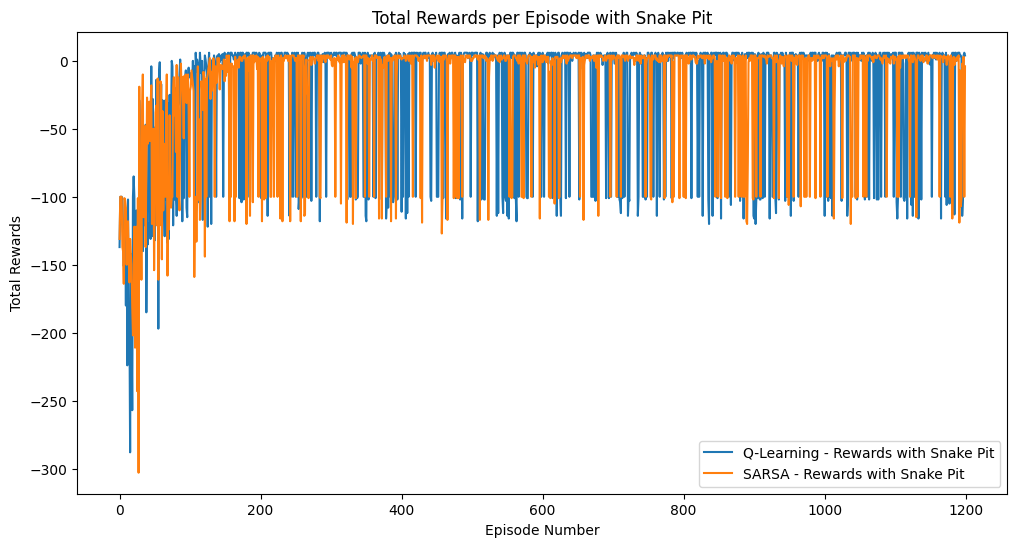

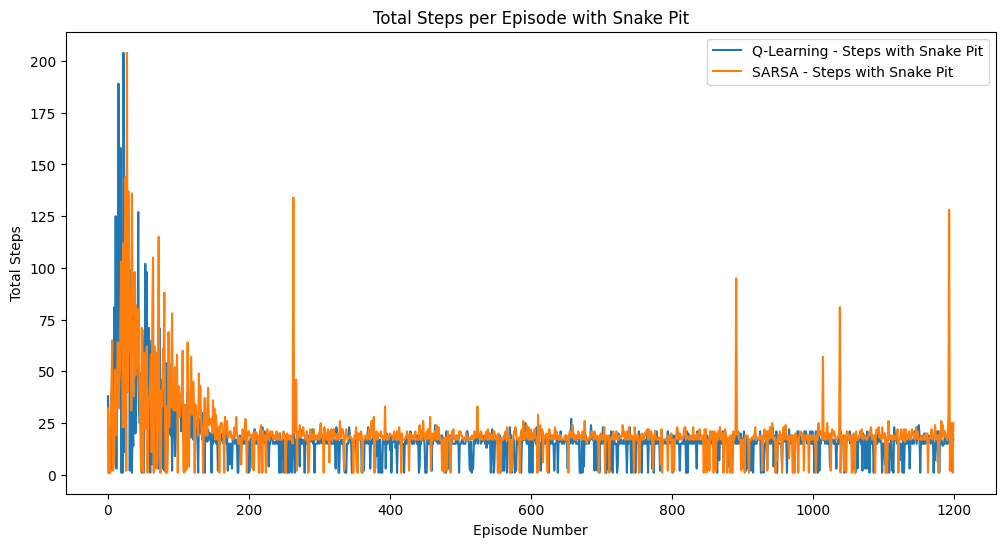

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def initialize_q_table(rows=4, cols=12):
    return np.zeros((4, rows * cols))  # 4 actions (UP, LEFT, RIGHT, DOWN), rows x cols states

def epsilon_greedy(state, q_table, epsilon):
    if np.random.random() < epsilon:
        action = np.random.choice(4)  # 4 actions
    else:
        action = np.argmax(q_table[:, state])
    return action

def move_agent(current_position, action, rows=4, cols=12):
    posX, posY = current_position
    if action == 0 and posX > 0:         # UP
        posX -= 1
    elif action == 1 and posY > 0:       # LEFT
        posY -= 1
    elif action == 2 and posY < cols-1:  # RIGHT
        posY += 1
    elif action == 3 and posX < rows-1:  # DOWN
        posX += 1
    return posX, posY

def evaluate_state(agent_pos, q_table, rows=4, cols=12):
    state = cols * agent_pos[0] + agent_pos[1]
    return state, np.amax(q_table[:, state])

def calculate_reward(state, rows=4, cols=12, snake_pit_penalty=-100):
    game_end = False
    reward = -1  # default reward for non-terminal states
    if state == rows * cols - 1:  # Goal state
        game_end = True
        reward = 20
    elif state >= (rows-1) * cols and state < rows * cols - 1:  # Cliff states
        game_end = True
        reward = -100
    elif state in [(rows-2)*cols+10, (rows-1)*cols+10]:  # Snake pit states
        game_end = True
        reward = snake_pit_penalty
    return reward, game_end

# Q-learning and SARSA algorithms with snake pit
def q_learning_sarsa_with_snake_pit(epsilon, num_episodes=1200, gamma=0.9, alpha=0.1, rows=4, cols=12, snake_pit_penalty=-100):
    q_table_q = initialize_q_table(rows, cols)
    q_table_s = initialize_q_table(rows, cols)
    rewards_summary_q = []
    rewards_summary_s = []
    steps_summary_q = []
    steps_summary_s = []

    for episode in range(num_episodes):
        agent_pos_q = agent_pos_s = (rows-1, 0)  # Starting position for both Q-learning and SARSA
        total_reward_q = total_reward_s = 0
        total_steps_q = total_steps_s = 0
        game_end_q = game_end_s = False

        state_q, _ = evaluate_state(agent_pos_q, q_table_q)
        state_s, _ = evaluate_state(agent_pos_s, q_table_s)
        action_s = epsilon_greedy(state_s, q_table_s, epsilon)

        while not game_end_q or not game_end_s:
            # Q-Learning
            if not game_end_q:
                action_q = epsilon_greedy(state_q, q_table_q, epsilon)
                next_pos_q = move_agent(agent_pos_q, action_q)
                total_steps_q += 1
                next_state_q, _ = evaluate_state(next_pos_q, q_table_q)
                reward_q, game_end_q = calculate_reward(next_state_q, snake_pit_penalty=snake_pit_penalty)
                total_reward_q += reward_q
                max_next_state_value_q = np.amax(q_table_q[:, next_state_q])
                q_table_q = update_q_table(q_table_q, state_q, action_q, reward_q, max_next_state_value_q, gamma, alpha)
                agent_pos_q = next_pos_q
                state_q = next_state_q

            # SARSA
            if not game_end_s:
                next_pos_s = move_agent(agent_pos_s, action_s)
                total_steps_s += 1
                next_state_s, _ = evaluate_state(next_pos_s, q_table_s)
                reward_s, game_end_s = calculate_reward(next_state_s, snake_pit_penalty=snake_pit_penalty)
                total_reward_s += reward_s
                next_action_s = epsilon_greedy(next_state_s, q_table_s, epsilon)
                next_state_value_s = q_table_s[next_action_s, next_state_s]
                q_table_s = update_q_table(q_table_s, state_s, action_s, reward_s, next_state_value_s, gamma, alpha)
                agent_pos_s, state_s, action_s = next_pos_s, next_state_s, next_action_s

        rewards_summary_q.append(total_reward_q)
        rewards_summary_s.append(total_reward_s)
        steps_summary_q.append(total_steps_q)
        steps_summary_s.append(total_steps_s)

    return q_table_q, rewards_summary_q, steps_summary_q, q_table_s, rewards_summary_s, steps_summary_s

# Perform Q-Learning and SARSA with snake pit
epsilon_value = 0.1
q_table_q, rewards_q_learning, steps_q_learning, q_table_s, rewards_sarsa, steps_sarsa = q_learning_sarsa_with_snake_pit(epsilon=epsilon_value)

# Plotting the results with snake pit
plt.figure(figsize=(12, 6))
plt.plot(rewards_q_learning, label='Q-Learning - Rewards with Snake Pit', lw=1.5)
plt.plot(rewards_sarsa, label='SARSA - Rewards with Snake Pit', lw=1.5)
plt.xlabel('Episode Number')
plt.ylabel('Total Rewards')
plt.title('Total Rewards per Episode with Snake Pit')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(steps_q_learning, label='Q-Learning - Steps with Snake Pit', lw=1.5)
plt.plot(steps_sarsa, label='SARSA - Steps with Snake Pit', lw=1.5)
plt.xlabel('Episode Number')
plt.ylabel('Total Steps')
plt.title('Total Steps per Episode with Snake Pit')
plt.legend()
plt.show()


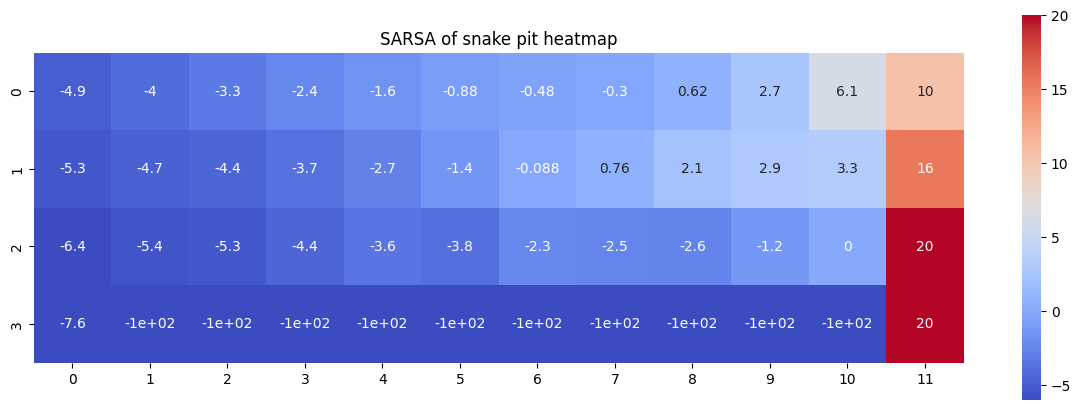

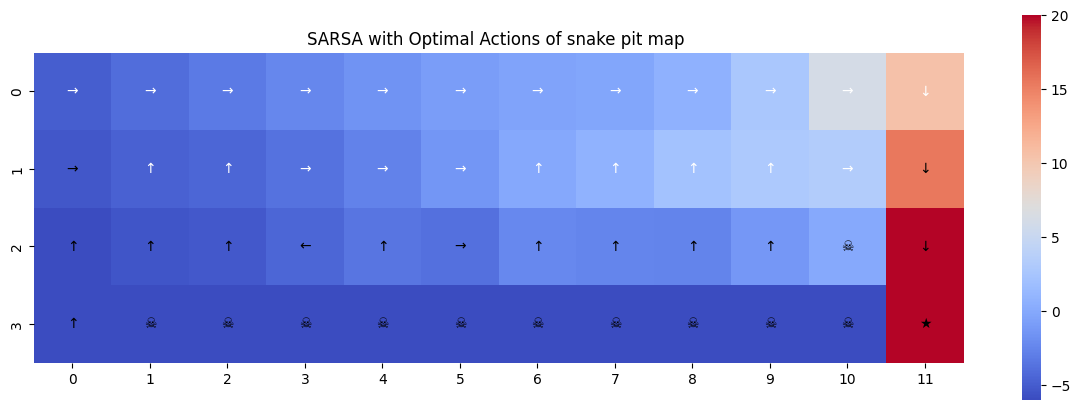

In [11]:
q_table_q, rewards_q_learning, steps_q_learning, q_table_s, rewards_sarsa, steps_sarsa = q_learning_sarsa_with_snake_pit(epsilon=epsilon_value)

# Plotting the Q-Table heatmap for SARSA
plt.figure(figsize=(15, 5))
q_table_sarsa = np.max(q_table_s, axis=0)
for i in range(len(q_table_sarsa)):
    if i >= 37 and i <= 46:
        q_table_sarsa[i] = -100  # Cliff states
    elif i == 47:
        q_table_sarsa[i] = 20  # Goal state

q_table_sarsa = q_table_sarsa.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_sarsa), cmap='coolwarm', annot=True, vmin=-6, vmax=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('SARSA of snake pit heatmap')
plt.show()

# Adjusting the code for arrow visualization for SARSA
h_sarsa = np.argmax(q_table_s, 0).tolist()

# Convert action indices to arrow symbols for SARSA
h_sarsa = ['↑' if i==0 else i for i in h_sarsa]
h_sarsa = ['←' if i==1 else i for i in h_sarsa]
h_sarsa = ['→' if i==2 else i for i in h_sarsa]
h_sarsa = ['↓' if i==3 else i for i in h_sarsa]

# Handling the cliff and goal states for SARSA
for i in range(len(h_sarsa)):
    if i >= 37 and i < 47:  # Cliff states
        h_sarsa[i] = '☠'  # Symbol for cliff
    elif i == 34:  # a snake pit
        h_sarsa[i] = '☠'

    elif i == 47:  # Goal state
        h_sarsa[i] = '★'  # Symbol for goal

# Reshape for heatmap for SARSA
h_sarsa = np.asarray(h_sarsa).reshape(4, 12)

# Create heatmap with arrows for SARSA
plt.figure(figsize=(15, 5))
q_table_sarsa = np.max(q_table_s, axis=0)
for i in range(len(q_table_sarsa)):
    if i >= 37 and i <= 46:
        q_table_sarsa[i] = -100
    elif i == 47:
        q_table_sarsa[i] = 20

q_table_sarsa = q_table_sarsa.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_sarsa), cmap='coolwarm', vmin=-6, vmax=20)

# Add arrows to the heatmap for SARSA
for i in range(4):
    for j in range(12):
        text = ax.text(j+0.5, i+0.5, h_sarsa[i, j], ha="center", va="center", color="black" if i in [2, 3] or (i == 1 and j in [0, 11]) else "white")

plt.title('SARSA with Optimal Actions of snake pit map ')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



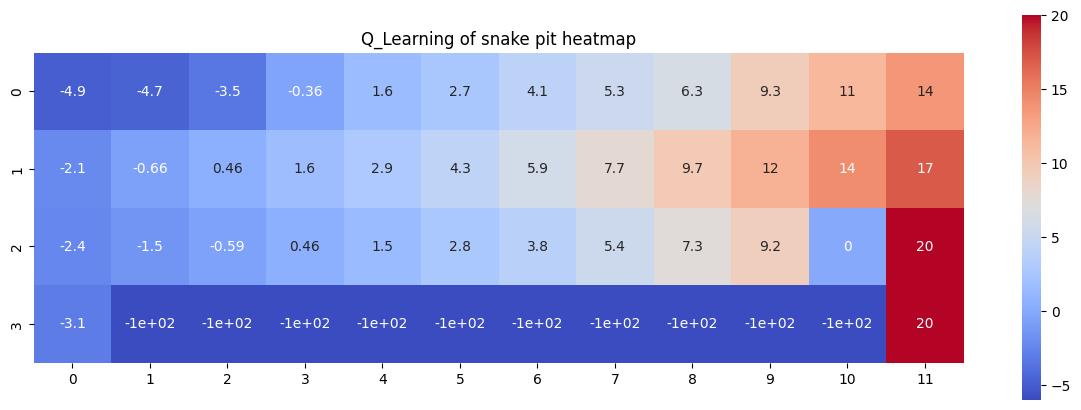

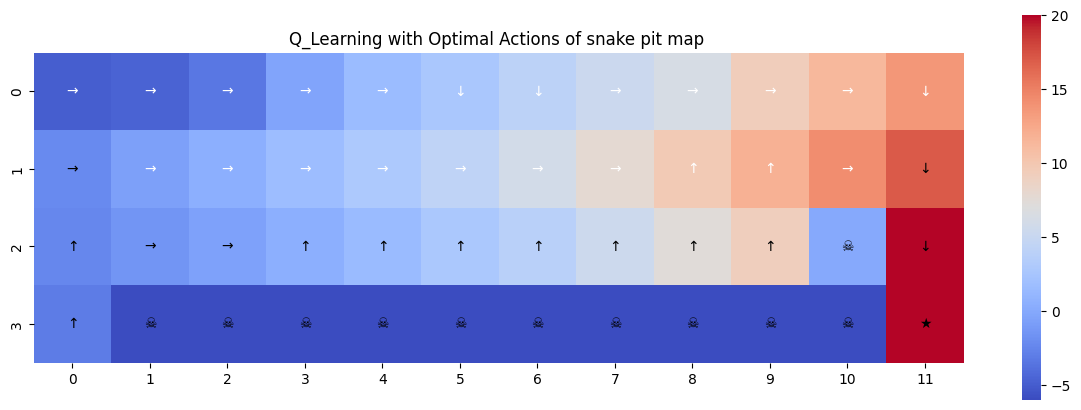

In [12]:
q_table_q, rewards_q_learning, steps_q_learning, q_table_s, rewards_sarsa, steps_sarsa = q_learning_sarsa_with_snake_pit(epsilon=epsilon_value)

# Plotting the Q-Table heatmap for SARSA
plt.figure(figsize=(15, 5))
q_table_q_learing = np.max(q_table_q, axis=0)
for i in range(len(q_table_q_learing)):
    if i >= 37 and i <= 46:
        q_table_q_learing[i] = -100  # Cliff states
    elif i == 47:
        q_table_q_learing[i] = 20  # Goal state

q_table_q_learing = q_table_q_learing.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_q_learing), cmap='coolwarm', annot=True, vmin=-6, vmax=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Q_Learning of snake pit heatmap')
plt.show()

# Adjusting the code for arrow visualization for SARSA
h_sarsa = np.argmax(q_table_s, 0).tolist()

# Convert action indices to arrow symbols for SARSA
h_sarsa = ['↑' if i==0 else i for i in h_sarsa]
h_sarsa = ['←' if i==1 else i for i in h_sarsa]
h_sarsa = ['→' if i==2 else i for i in h_sarsa]
h_sarsa = ['↓' if i==3 else i for i in h_sarsa]

# Handling the cliff and goal states for SARSA
for i in range(len(h_sarsa)):
    if i >= 37 and i < 47:  # Cliff states
        h_sarsa[i] = '☠'  # Symbol for cliff
    elif i == 34:  # a snake pit
        h_sarsa[i] = '☠'

    elif i == 47:  # Goal state
        h_sarsa[i] = '★'  # Symbol for goal

# Reshape for heatmap for SARSA
h_sarsa = np.asarray(h_sarsa).reshape(4, 12)

# Create heatmap with arrows for SARSA
plt.figure(figsize=(15, 5))
q_table_q_learing = np.max(q_table_q, axis=0)
for i in range(len(q_table_q_learing)):
    if i >= 37 and i <= 46:
        q_table_q_learing[i] = -100
    elif i == 47:
        q_table_q_learing[i] = 20

q_table_q_learing = q_table_q_learing.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_q_learing), cmap='coolwarm', vmin=-6, vmax=20)

# Add arrows to the heatmap for SARSA
for i in range(4):
    for j in range(12):
        text = ax.text(j+0.5, i+0.5, h_sarsa[i, j], ha="center", va="center", color="black" if i in [2, 3] or (i == 1 and j in [0, 11]) else "white")

plt.title('Q_Learning with Optimal Actions of snake pit map ')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class ReplayBuffer:
    def __init__(self, max_size):
        self.buffer = []
        self.max_size = max_size
        self.size = 0

    def add(self, experience):
        if self.size < self.max_size:
            self.buffer.append(experience)
            self.size += 1
        else:
            self.buffer.pop(0)
            self.buffer.append(experience)

    def sample(self, batch_size):
        if self.size < batch_size:
            sample_indices = np.random.choice(range(self.size), self.size, replace=False)
        else:
            sample_indices = np.random.choice(range(self.size), batch_size, replace=False)
        return [self.buffer[i] for i in sample_indices]


def initialize_q_table(rows, cols):
    return np.zeros((4, rows * cols))  # 4 actions: UP, LEFT, RIGHT, DOWN

def epsilon_greedy(state, q_table, epsilon):
    if np.random.random() < epsilon:
        return np.random.choice(4)  # Choose a random action
    return np.argmax(q_table[:, state])  # Choose the best action

def q_learning_with_replay_buffer(epsilon, num_episodes, gamma, alpha, rows, cols, snake_pit_penalty, buffer_size, batch_size):
    q_table = initialize_q_table(rows, cols)
    replay_buffer = ReplayBuffer(buffer_size)
    rewards_summary = []
    steps_summary = []

    for episode in range(num_episodes):
        agent_pos = (rows-1, 0)  # Starting position
        total_reward = 0
        total_steps = 0
        game_end = False
        state, _ = evaluate_state(agent_pos, q_table, rows, cols)

        while not game_end:
            action = epsilon_greedy(state, q_table, epsilon)
            next_pos = move_agent(agent_pos, action, rows, cols)
            total_steps += 1
            next_state, _ = evaluate_state(next_pos, q_table, rows, cols)
            reward, game_end = calculate_reward(next_state, rows, cols, snake_pit_penalty)
            total_reward += reward

            replay_buffer.add((state, action, reward, next_state, game_end))

            # Learn from a batch of past experiences
            if replay_buffer.size >= batch_size:
                experiences = replay_buffer.sample(batch_size)
                for exp in experiences:
                    state_exp, action_exp, reward_exp, next_state_exp, done_exp = exp
                    max_next_state_value = np.amax(q_table[:, next_state_exp]) if not done_exp else 0
                    q_table[action_exp, state_exp] += alpha * (reward_exp + gamma * max_next_state_value - q_table[action_exp, state_exp])

            agent_pos = next_pos
            state = next_state

        rewards_summary.append(total_reward)
        steps_summary.append(total_steps)

    return q_table, rewards_summary, steps_summary

# Parameters
epsilon_value = 0.1
num_episodes = 1200
gamma_value = 0.9
alpha_value = 0.1
rows_value = 4
cols_value = 12
snake_pit_penalty_value = -100
buffer_size_value = 1000
batch_size_value = 64

# Perform Q-Learning with Replay Buffer
q_table_q, rewards_q_learning, steps_q_learning = q_learning_with_replay_buffer(
    epsilon=epsilon_value, num_episodes=num_episodes, gamma=gamma_value,
    alpha=alpha_value, rows=rows_value, cols=cols_value,
    snake_pit_penalty=snake_pit_penalty_value, buffer_size=buffer_size_value,
    batch_size=batch_size_value)

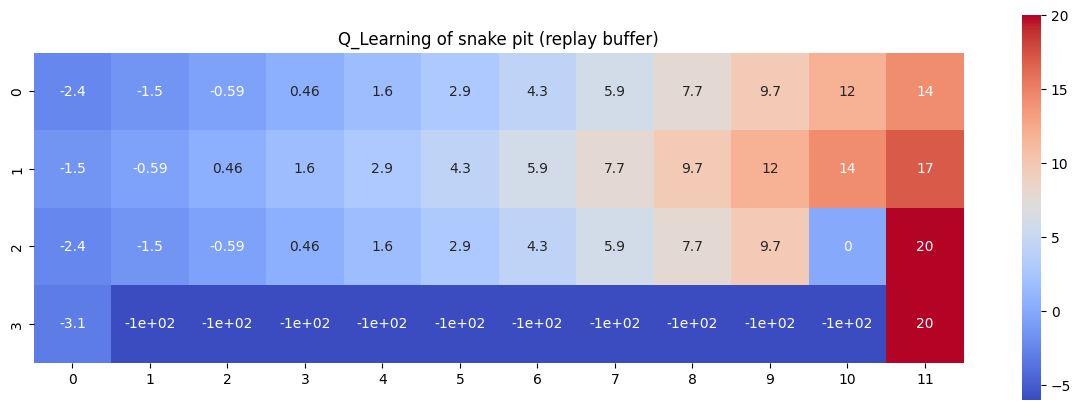

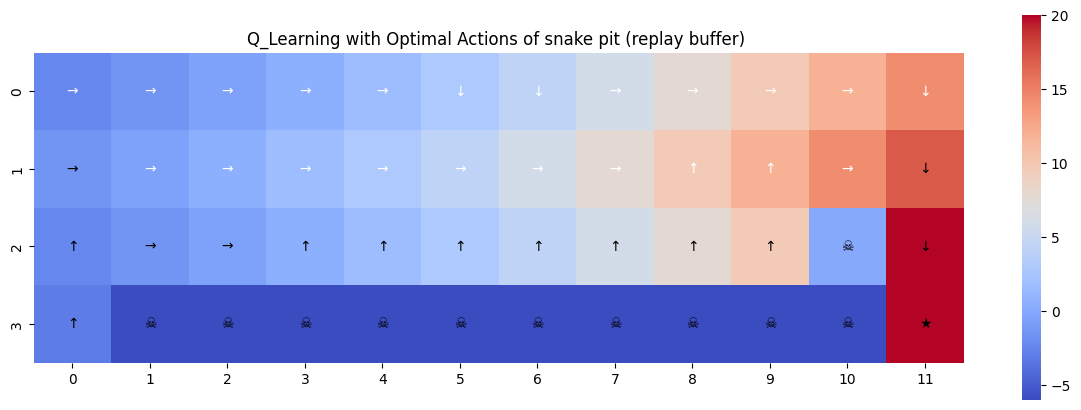

In [18]:
# Plotting the Q-Table heatmap for SARSA
plt.figure(figsize=(15, 5))
q_table_q_learing = np.max(q_table_q, axis=0)
for i in range(len(q_table_q_learing)):
    if i >= 37 and i <= 46:
        q_table_q_learing[i] = -100  # Cliff states
    elif i == 47:
        q_table_q_learing[i] = 20  # Goal state

q_table_q_learing = q_table_q_learing.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_q_learing), cmap='coolwarm', annot=True, vmin=-6, vmax=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Q_Learning of snake pit (replay buffer)')
plt.show()

# Adjusting the code for arrow visualization for SARSA
h_sarsa = np.argmax(q_table_s, 0).tolist()

# Convert action indices to arrow symbols for SARSA
h_sarsa = ['↑' if i==0 else i for i in h_sarsa]
h_sarsa = ['←' if i==1 else i for i in h_sarsa]
h_sarsa = ['→' if i==2 else i for i in h_sarsa]
h_sarsa = ['↓' if i==3 else i for i in h_sarsa]

# Handling the cliff and goal states for SARSA
for i in range(len(h_sarsa)):
    if i >= 37 and i < 47:  # Cliff states
        h_sarsa[i] = '☠'  # Symbol for cliff
    elif i == 34:  # a snake pit
        h_sarsa[i] = '☠'

    elif i == 47:  # Goal state
        h_sarsa[i] = '★'  # Symbol for goal

# Reshape for heatmap for SARSA
h_sarsa = np.asarray(h_sarsa).reshape(4, 12)

# Create heatmap with arrows for SARSA
plt.figure(figsize=(15, 5))
q_table_q_learing = np.max(q_table_q, axis=0)
for i in range(len(q_table_q_learing)):
    if i >= 37 and i <= 46:
        q_table_q_learing[i] = -100
    elif i == 47:
        q_table_q_learing[i] = 20

q_table_q_learing = q_table_q_learing.reshape((4, 12))
ax = sns.heatmap(np.array(q_table_q_learing), cmap='coolwarm', vmin=-6, vmax=20)

# Add arrows to the heatmap for SARSA
for i in range(4):
    for j in range(12):
        text = ax.text(j+0.5, i+0.5, h_sarsa[i, j], ha="center", va="center", color="black" if i in [2, 3] or (i == 1 and j in [0, 11]) else "white")

plt.title('Q_Learning with Optimal Actions of snake pit (replay buffer) ')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()